In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Model
from keras.layers import Bidirectional, LSTM, Activation, Dropout, Dense,Input, Embedding 
from keras.callbacks import EarlyStopping

In [50]:
sms= pd.read_csv("spam.csv" , header=0, encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [51]:
sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

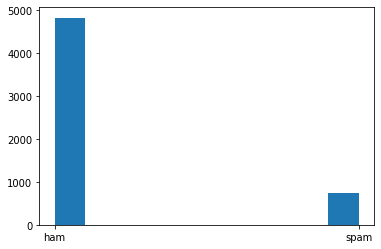

In [52]:
sms.v1.hist(grid=False)

In [53]:
original_x= sms['v2']
original_y=sms['v1']
label=LabelEncoder()
y=label.fit_transform(original_y)
Y=y.reshape(-1,1)

In [54]:
X_train, X_test, y_train, y_test=train_test_split(original_x, Y, test_size=0.2, random_state=123)

In [55]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


In [56]:
inputs= Input(name="inputs", shape=[max_len])
layers=Embedding(max_words, 50, input_length=max_len)(inputs)
layer=LSTM(64)(layers)
layer=Dense(256)(layer)
layer=Activation('relu')(layer)
layer=Dropout(0.5)(layer)
layer=Dense(1)(layer)
layer=Activation('sigmoid')(layer)
model=Model(inputs=inputs, output=layer)

C:\Users\manirudh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  if __name__ == '__main__':


In [57]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257 

In [63]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [65]:
model.fit(sequences_matrix,y_train,batch_size=64,epochs=25,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3565 samples, validate on 892 samples
Epoch 1/25
3565/3565 [==============================] - 13s 4ms/step - loss: 0.0958 - accuracy: 0.9728 - val_loss: 0.0687 - val_accuracy: 0.9776
Epoch 2/25
3565/3565 [==============================] - 13s 4ms/step - loss: 0.0428 - accuracy: 0.9891 - val_loss: 0.0662 - val_accuracy: 0.9798
Epoch 3/25
3565/3565 [==============================] - 13s 4ms/step - loss: 0.0334 - accuracy: 0.9916 - val_loss: 0.0476 - val_accuracy: 0.9899
Epoch 4/25
3565/3565 [==============================] - 15s 4ms/step - loss: 0.0284 - accuracy: 0.9927 - val_loss: 0.0562 - val_accuracy: 0.9854


In [68]:
test_sequence=tok.texts_to_sequences(X_test)

In [69]:
sequences_test = sequence.pad_sequences(test_sequence,maxlen=max_len)

In [75]:
accr = model.evaluate(sequences_test,y_test)

1115/1115 [==============================] - 1s 948us/step


In [76]:
print('Test set\n  Loss: {}\n  Accuracy: {}'.format(accr[0],accr[1]))

Test set
  Loss: 0.06020326488755744
  Accuracy: 0.9847533702850342
